# I] Import

In [24]:
import pandas, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

## functions & options


In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [34]:
path = output_file_directory + "ATG7/TCGA_GTEX/all_tissues/"
path2 = 'dataframes_for_input/'

# 2] Survival for ATG7(1) and ATG7(2) 

## A) Data download

In [35]:
%%time
# DL data ATG7 isoform expression and High low expression separation

df_total_LoHi_prim= pandas.read_csv(path+path2+'df_total_LoHi_prim.tsv', sep = "\t")
df_ATG7_iso1_LoHi_prim= pandas.read_csv(path+path2+'df_ATG7_iso1_LoHi_prim.tsv', sep = "\t")
df_ATG7_iso2_LoHi_prim= pandas.read_csv(path+path2+'df_ATG7_iso2_LoHi_prim.tsv', sep = "\t")

print(df_ATG7_iso2_LoHi_prim.shape)
df_ATG7_iso2_LoHi_prim.head(3)

(7974, 20)
Wall time: 120 ms


,sample,Sample_Type,Primary_Site,L/H,OS,OS_time,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_tpm,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,TCGA-P6-A5OG-01,Primary Tumor,Adrenal Gland,Low_iso2,1.0,383.0,4.841178,4.140146,1.686916,0.000000,27.664191,16.632271,2.219678,0.000000,18.851949,88.225739,11.774261,0.000000,0.601220,0.080236
1,TCGA-OR-A5J8-01,Primary Tumor,Adrenal Gland,Low_iso2,1.0,579.0,4.816092,4.629437,0.400624,0.000000,27.170080,23.751377,0.320079,0.000000,24.071456,98.670297,1.329703,0.000000,0.874174,0.011781
2,TCGA-OR-A5K5-01,Primary Tumor,Adrenal Gland,Low_iso2,1.0,498.0,4.803555,4.291540,0.201684,0.056593,26.926343,18.583140,0.150040,0.040007,18.773186,98.987671,0.799224,0.213105,0.690147,0.005572


In [55]:
print(df_ATG7_iso1_LoHi_prim["Primary_Site"].value_counts())

Breast                     1003
Lung                        943
Kidney                      759
Brain                       634
Head And Neck Region        476
Thyroid Gland               464
Prostate                    412
Stomach                     391
Bladder                     338
Ovary                       324
Colon                       281
Cervix                      277
Soft Tissue,Bone            229
Liver                       180
Esophagus                   177
Pancreas                    162
Paraganglia                 150
Endometrium                 140
Testis                      115
Thymus                       90
Rectum                       88
Skin                         77
Lining Of Body Cavities      75
Adrenal Gland                52
Uterus                       45
Eye                          36
Bile Duct                    31
Lymphatic Tissue             25
Name: Primary_Site, dtype: int64


In [46]:
#transform Days in Months (OS_time)
for df in df_total_LoHi_prim, df_ATG7_iso1_LoHi_prim, df_ATG7_iso2_LoHi_prim:
    df['OS_time'] = df['OS_time'] / 30

In [47]:
#split to have low and High in different df
#total
df_total_Low = df_total_LoHi_prim[df_total_LoHi_prim['L/H'].str.startswith('Low_total')]
df_total_High = df_total_LoHi_prim[df_total_LoHi_prim['L/H'].str.startswith('High_total')]

##iso1
df_iso1_Low = df_ATG7_iso1_LoHi_prim[df_ATG7_iso1_LoHi_prim['L/H'].str.startswith('Low_iso1')]
df_iso1_High = df_ATG7_iso1_LoHi_prim[df_ATG7_iso1_LoHi_prim['L/H'].str.startswith('High_iso1')]

##iso2
df_iso2_Low = df_ATG7_iso2_LoHi_prim[df_ATG7_iso2_LoHi_prim['L/H'].str.startswith('Low_iso2')]
df_iso2_High = df_ATG7_iso2_LoHi_prim[df_ATG7_iso2_LoHi_prim['L/H'].str.startswith('High_iso2')]

df_iso1_Low.head()

,sample,Sample_Type,Primary_Site,L/H,OS,OS_time,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_tpm,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,TCGA-OR-A5L4-01,Primary Tumor,Adrenal Gland,Low_iso1,0.0,1.074444,3.768809,2.978529,2.198192,0.000000,12.630902,6.881821,3.589040,0.000000,10.470861,65.723543,34.276457,0.000000,0.544840,0.284148
1,TCGA-OR-A5LO-01,Primary Tumor,Adrenal Gland,Low_iso1,1.0,2.672222,3.706827,2.584782,1.840010,1.214107,12.057679,4.999249,2.580125,1.319972,8.899346,56.175466,28.992298,14.832237,0.414611,0.213982
2,TCGA-OU-A5PI-01,Primary Tumor,Adrenal Gland,Low_iso1,0.0,1.301111,3.642304,2.928011,1.207911,0.485520,11.486556,6.610603,1.310029,0.400091,8.320722,79.447458,15.744178,4.808363,0.575508,0.114049
3,TCGA-OR-A5LJ-01,Primary Tumor,Adrenal Gland,Low_iso1,1.0,1.227778,3.421231,2.952366,0.137464,0.070407,9.712559,6.740175,0.099970,0.050013,6.890157,97.823231,1.450912,0.725857,0.693965,0.010293
4,TCGA-PK-A5H8-01,Primary Tumor,Adrenal Gland,Low_iso1,0.0,4.025556,3.400392,2.959336,1.189050,0.000000,9.558930,6.777659,1.280026,0.000000,8.057686,84.114220,15.885780,0.000000,0.709040,0.133909


## B)  Log-Rank Test

In [48]:
# Log-Rank Test to have pvalue for low vs high expression
## Define variables:
infos = "ATG7(total):", "ATG7(1):", "ATG7(2):"
dfs_low = df_total_Low, df_iso1_Low, df_iso2_Low
dfs_high = df_total_High, df_iso1_High, df_iso2_High

for i in range(len(infos)):
    info = infos[i]
    df_low = dfs_low[i]
    df_high = dfs_high[i]
   
    Time = df_low['OS_time']
    Event = df_low['OS']
    Time2 = df_high['OS_time']
    Event2 = df_high['OS']

    results = logrank_test(Time,Time2,event_observed_A=Event, event_observed_B=Event2)
    print("Results for ", info)
    results.print_summary()
    print()


Results for  ATG7(total):


C:\Users\kja11\anaconda3\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.86 0.05      4.34


Results for  ATG7(1):


C:\Users\kja11\anaconda3\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          12.49 <0.005     11.25


Results for  ATG7(2):


C:\Users\kja11\anaconda3\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.24 0.13      2.90

## C)  CoxPHFitter

In [49]:
cph = CoxPHFitter()
df = df_ATG7_iso1_LoHi_prim.iloc[:,4:7]
cph.fit(df,'OS_time', 'OS')

cph_results = cph.summary
cph_results = cph_results[['exp(coef)', 'p']]
cph_results.reset_index(inplace= True)
cph_results

C:\Users\kja11\anaconda3\lib\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]


,covariate,exp(coef),p
0,ATG7,1.107098,0.010787


In [50]:
cph = CoxPHFitter()
df = df_ATG7_iso1_LoHi_prim.iloc[:,4:8]
cph.fit(df,'OS_time', 'OS')

cph_results = cph.summary
cph_results = cph_results[['exp(coef)', 'p']]
cph_results.reset_index(inplace= True)
cph_results

C:\Users\kja11\anaconda3\lib\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]


,covariate,exp(coef),p
0,ATG7,1.216781,0.000023
1,ATG7_1,0.837283,0.000075


In [51]:
cph = CoxPHFitter()
df = df_ATG7_iso1_LoHi_prim.iloc[:,4:9]
cph.fit(df,'OS_time', 'OS')

cph_results = cph.summary
cph_results = cph_results[['exp(coef)', 'p']]
cph_results.reset_index(inplace= True)
cph_results

C:\Users\kja11\anaconda3\lib\site-packages\lifelines\utils\__init__.py:997: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  nonnumeric_cols = [col for (col, dtype) in df.dtypes.iteritems() if dtype.name == "category" or dtype.kind not in "biuf"]


,covariate,exp(coef),p
0,ATG7,1.629084,1.051769e-06
1,ATG7_1,0.687453,4.396737e-07
2,ATG7_2,0.854174,1.039364e-03


## D)  Kaplan Meier

In [52]:
path2 = 'figs_survival/'

Results for  ATG7(total): in all primary tumors


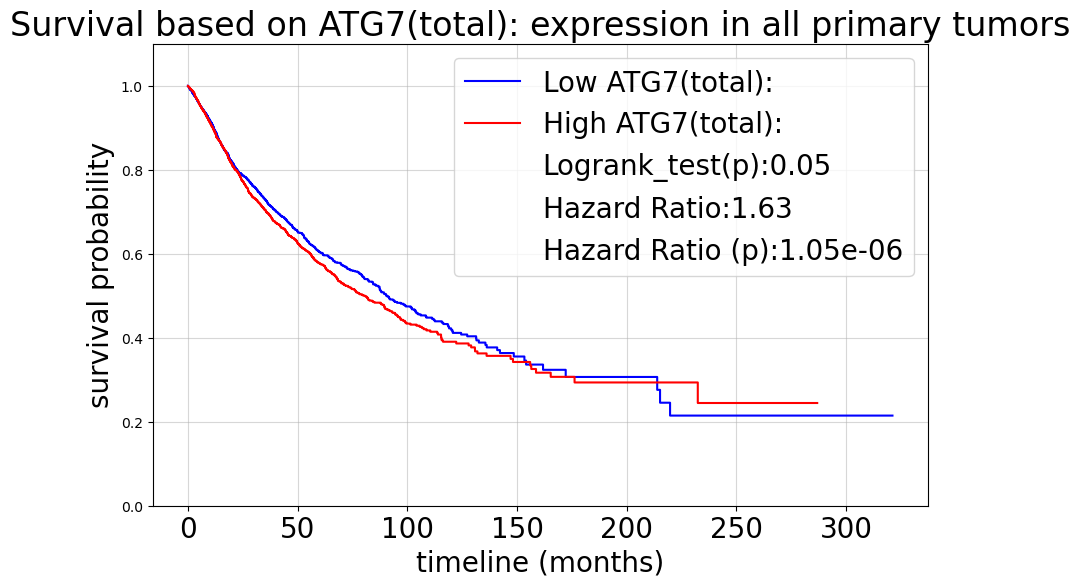

Results for  ATG7(1): in all primary tumors


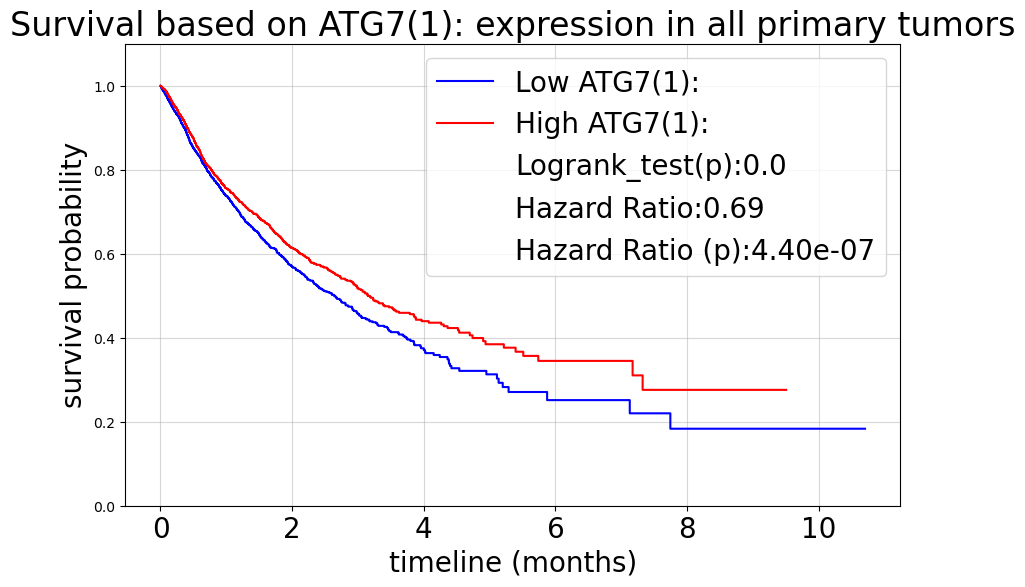

Results for  ATG7(2): in all primary tumors


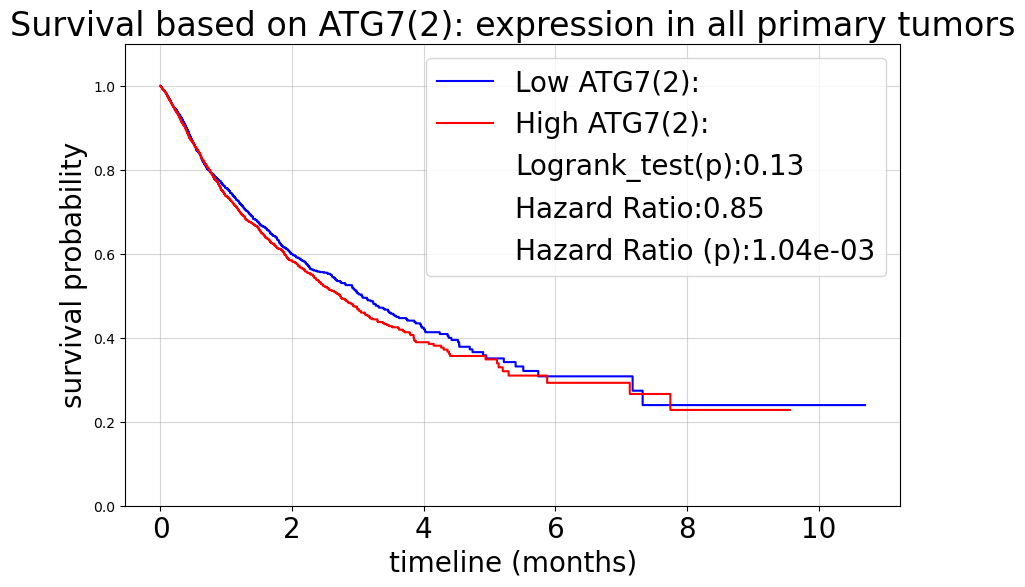

In [53]:
#KaplanMeier graph
infos = "ATG7(total):", "ATG7(1):", "ATG7(2):"
isoforms = "ATG7", "ATG7_1", "ATG7_2"
dfs_low = df_total_Low, df_iso1_Low, df_iso2_Low
dfs_high = df_total_High, df_iso1_High, df_iso2_High

#Create survival table 
kmf = KaplanMeierFitter() 
tables_kmf = []

for i in range(len(infos)):
    info = infos[i]
    isoform = isoforms[i]
    df_low = dfs_low[i]
    df_high = dfs_high[i]
    
    #extraction of cph result (Hazard Ratio + pvalue)
    cph_atg7 = cph_results.loc[(cph_results['covariate'] == isoform)]
    hr_res = str(cph_atg7.loc[cph_atg7.index[0],'exp(coef)'].round(2))
    hr_pvalue_res = cph_atg7.loc[cph_atg7.index[0],'p']
    hr_pvalue_res = f"{hr_pvalue_res:.2e}"
    
    # STATS_Log-Rank Test: Does ATG7 expression affect survival ?
    Time = df_low['OS_time']
    Event = df_low['OS']
    Time2 = df_high['OS_time']
    Event2 = df_high['OS']

    results = logrank_test(Time,Time2,event_observed_A=Event, event_observed_B=Event2)
    print("Results for ", info, 'in all primary tumors')
    
    #extract pvalue from logrank
    logrank_summary = results.summary
    logrank_res = str(logrank_summary.loc[logrank_summary.index[0], 'p'].round(2))
      
    ##Low expression
    kmf.fit(Time, Event, label = "Low_KM_estim")
    table_kmf_Low = kmf.survival_function_
    label1 = "Low "+ info
    ##High expression
    kmf.fit(Time2, Event2, label = 'High_KM_estim')    
    table_kmf_High = kmf.survival_function_
    label2 = "High "+ info

    #save data
    tables_kmf.append(table_kmf_Low)
    tables_kmf.append(table_kmf_High)
    
    #Kaplan Meier Plot
    plt.figure(figsize=(10,6))
    seaborn.lineplot(data=table_kmf_Low, x='timeline', y='Low_KM_estim', color = "blue", drawstyle='steps-post', label = label1)
    seaborn.lineplot(data=table_kmf_High, x='timeline', y='High_KM_estim', color = "red", drawstyle='steps-post', label = label2)
    seaborn.regplot(x=[],y=[], marker=" ", label= 'Logrank_test(p):'+ logrank_res)
    seaborn.regplot(x=[],y=[], marker=" ", label= 'Hazard Ratio:'+hr_res)
    seaborn.regplot(x=[],y=[], marker=" ", label= 'Hazard Ratio (p):'+hr_pvalue_res)
    
    plt.grid(alpha = 0.5)
    plt.legend()
    plt.ylim(0,1.1) 
    plt.xlabel('timeline (months)')
    plt.ylabel('survival probability')
    
    title_text = "Survival based on "+info+ " expression in all primary tumors"
    plt.title(title_text)
    
    title_file = 'primary_kaplan_m_'+info+'_alltissue.svg'
    plt.savefig(path+path2+title_file)
    plt.show()
    plt.close()

# 3] Survival for ratio ATG7(1) / ATG7(2)

## A) Data download

In [9]:
%%time
# DL data ATG7 isoform expression and High low expression separation
path = output_file_directory + "/ATG7/dataframes_for_input/"
df_ATG7_ratio1_2_LoHi_prim= pandas.read_csv(path+'df_ATG7_ratio1_2_LoHi_prim.tsv', sep = "\t")
df_ATG7_ratio2_1_LoHi_prim= pandas.read_csv(path+'df_ATG7_ratio2_1_LoHi_prim.tsv', sep = "\t")

print(df_ATG7_ratio2_1_LoHi_prim.shape)
df_ATG7_ratio2_1_LoHi_prim.head(3)

(9130, 25)
Wall time: 107 ms


,sample,Sample_Type,Primary_Site,L/H,OS,OS_time,ATG7,ATG7_1,ATG7_2,ATG7_3,...,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm,ratio_1_2,ratio_2_1
0,TCGA-P6-A5OG-01,Primary Tumor,Adrenal Gland,Low_iso2/iso1,1.0,383.0,4.790,4.056,1.151,-9.966,...,4.140146,1.686916,18.851948,88.225740,11.774261,-7.930814e-07,0.601220,0.080236,7.493102,0.133456
1,TCGA-OR-A5J8-01,Primary Tumor,Adrenal Gland,Low_iso2/iso1,1.0,579.0,4.764,4.570,-1.639,-9.966,...,4.629437,0.400624,24.071456,98.670297,1.329703,-6.211145e-07,0.874174,0.011781,74.204745,0.013476
2,TCGA-OR-A5K5-01,Primary Tumor,Adrenal Gland,Low_iso2/iso1,1.0,498.0,4.751,4.216,-2.727,-4.608,...,4.291540,0.201684,18.773186,98.987671,0.799224,2.131050e-01,0.690147,0.005572,123.854793,0.008074


In [10]:
#split to have low and High in different df
##iso1
df_ratio12_Low = df_ATG7_ratio1_2_LoHi_prim[df_ATG7_ratio1_2_LoHi_prim['L/H'].str.startswith('Low_iso1/iso2')]
df_ratio12_High = df_ATG7_ratio1_2_LoHi_prim[df_ATG7_ratio1_2_LoHi_prim['L/H'].str.startswith('High_iso1/iso2')]

##iso2
df_ratio21_Low = df_ATG7_ratio2_1_LoHi_prim[df_ATG7_ratio2_1_LoHi_prim['L/H'].str.startswith('Low_iso2/iso1')]
df_ratio21_High = df_ATG7_ratio2_1_LoHi_prim[df_ATG7_ratio2_1_LoHi_prim['L/H'].str.startswith('High_iso2/iso1')]
df_ratio21_High.head()

,sample,Sample_Type,Primary_Site,L/H,OS,OS_time,ATG7,ATG7_1,ATG7_2,ATG7_3,...,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm,ratio_1_2,ratio_2_1
4565,TCGA-OR-A5J2-01,Primary Tumor,Adrenal Gland,High_iso2/iso1,1.0,1677.0,4.824,3.239,1.903,1.2580,...,3.384104,2.244552,15.569935,60.632203,24.013593,15.354204,0.333301,0.132005,2.524912,0.396053
4566,TCGA-PA-A5YG-01,Primary Tumor,Adrenal Gland,High_iso2/iso1,0.0,756.0,4.600,3.060,2.783,1.1250,...,3.223226,2.978529,17.400563,47.922164,39.549417,12.528419,0.343858,0.283781,1.211703,0.825284
4567,TCGA-OR-A5JV-01,Primary Tumor,Adrenal Gland,High_iso2/iso1,0.0,2023.0,4.543,2.922,2.571,1.3620,...,3.100635,2.795188,16.088585,47.101474,36.928118,15.970408,0.325081,0.254867,1.275491,0.784012
4568,TCGA-OR-A5L8-01,Primary Tumor,Adrenal Gland,High_iso2/iso1,0.0,885.0,4.234,3.081,2.008,0.9862,...,3.241994,2.328044,14.462210,58.504250,27.805171,13.690579,0.449660,0.213709,2.104078,0.475268
4569,TCGA-OR-A5LP-01,Primary Tumor,Adrenal Gland,High_iso2/iso1,0.0,1857.0,4.058,2.501,2.118,0.6145,...,2.735474,2.416817,11.529721,49.088581,37.641131,13.270288,0.339817,0.260572,1.304121,0.766800


## B)  Log-Rank Test

In [11]:
# Log-Rank Test for Low Expression
## Define variables:
all_data = [["ratio 1/2:", df_ratio12_Low, df_ratio12_High], 
            ["ratio 2/1:", df_ratio21_Low, df_ratio21_High]]

for data in all_data:
    
    Time=data[1]['OS_time']
    Event=data[1]['OS']
    Time2=data[2]['OS_time']
    Event2=data[2]['OS']

    results = logrank_test(Time,Time2,event_observed_A=Event, event_observed_B=Event2)
    print("Results for ", data[0])
    results.print_summary()
    print()

Results for  ratio 1/2:


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.96 0.33      1.61


Results for  ratio 2/1:


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.70 0.03      5.05

## C)  CoxPHFitter

In [12]:
df_ATG7_ratio1_2_LoHi_prim.columns

Index(['sample', 'Sample_Type', 'Primary_Site', 'L/H', 'OS', 'OS_time', 'ATG7',
       'ATG7_1', 'ATG7_2', 'ATG7_3', 'ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm',
       'ATG7_3tpm', 'log2_p1_ATG7_total', 'log2_p1_ATG7_1', 'log2_p1_ATG7_2',
       'ATG7_prot_tot', 'ATG7_1perc', 'ATG7_2perc', 'ATG7_3perc', 'ATG7_1norm',
       'ATG7_2norm', 'ratio_1_2', 'ratio_2_1'],
      dtype='object')

In [13]:
myselection = [i for i in range(4,6)]
add = [23,24]
myselection.extend(add)
myselection

df = df_ATG7_ratio1_2_LoHi_prim.iloc[:,myselection]
df.head()

,OS,OS_time,ratio_1_2,ratio_2_1
0,1.0,1677.0,2.524912,0.396053
1,0.0,756.0,1.211703,0.825284
2,0.0,2023.0,1.275491,0.784012
3,0.0,885.0,2.104078,0.475268
4,0.0,1857.0,1.304121,0.766800


In [205]:
myselection = [i for i in range(4,6)]
add = [24,23]
myselection.extend(add)
myselection

df = df_ATG7_ratio1_2_LoHi_prim.iloc[:,myselection]
df.head()

,OS,OS_time,ratio_1_2,ratio_2_1
0,1.0,1677.0,2.524912,0.396053
1,0.0,756.0,1.211703,0.825284
2,0.0,2023.0,1.275491,0.784012
3,0.0,885.0,2.104078,0.475268
4,0.0,1857.0,1.304121,0.766800


## Does it normal to have use difference between r1/2 and r2/1 ?

In [206]:
#CoxPHFitter
##Cox proportional hazard method is to notice, exp(coef) = HR
##how different factors in our dataset impact the event of interest

cph = CoxPHFitter()
cph.fit(df,'OS_time', 'OS')

cph_results = cph.summary
cph_results = cph_results[['exp(coef)', 'p']]
cph_results.reset_index(inplace= True)
cph_results

,covariate,exp(coef),p
0,ratio_1_2,1.000000,0.185759
1,ratio_2_1,1.199753,0.000030


## D)  Kaplan Meier

Results for  ratio ATG7(1)(2) in all primary tumors
Results for  ratio ATG7(2)(1) in all primary tumors


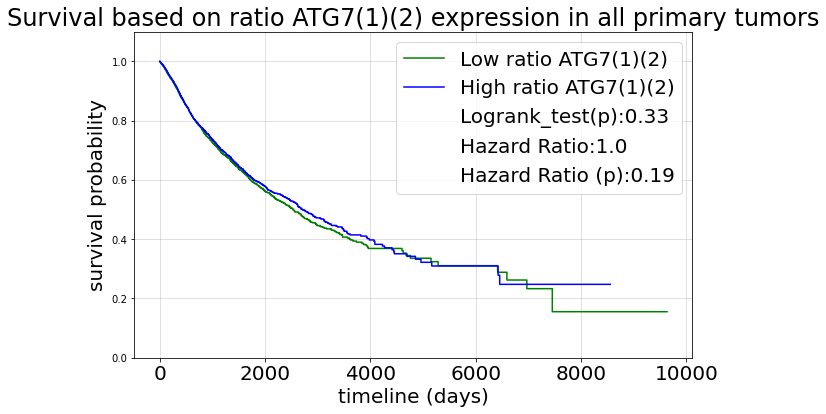

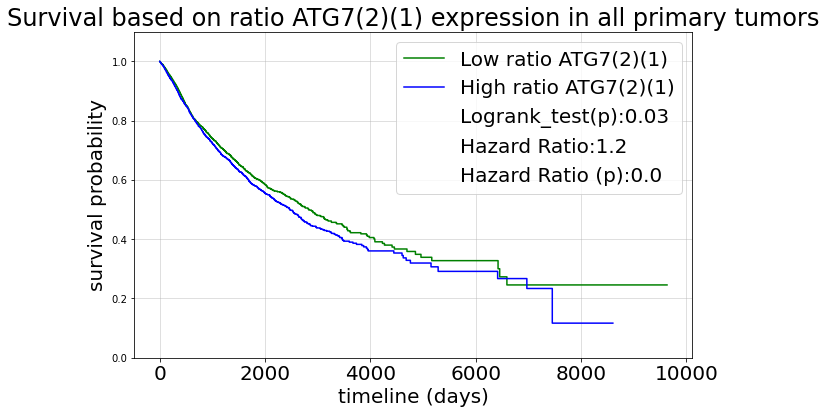

In [208]:
#KaplanMeier graph
all_data = [["ratio ATG7(1)(2)", 'ratio_1_2', df_ratio12_Low, df_ratio12_High],
            ["ratio ATG7(2)(1)", 'ratio_2_1', df_ratio21_Low, df_ratio21_High]]

#Create survival table 
kmf = KaplanMeierFitter() 
tables_kmf = []

for data in all_data:
    
    #extraction of cph result (Hazard Ratio + pvalue)
    cph_atg7 = cph_results.loc[(cph_results['covariate'] == data[1])]
    hr_res = str(cph_atg7.loc[cph_atg7.index[0],'exp(coef)'].round(2))
    hr_pvalue_res = str(cph_atg7.loc[cph_atg7.index[0],'p'].round(2))
    
    
    # STATS_Log-Rank Test: Does ATG7 expression affect survival ?
    Time=data[2]['OS_time']
    Event=data[2]['OS']
    Time2=data[3]['OS_time']
    Event2=data[3]['OS']

    results = logrank_test(Time,Time2,event_observed_A=Event, event_observed_B=Event2)

    print("Results for ", data[0], 'in all primary tumors')
    
    #extract pvalue from logrank
    logrank_summary = results.summary
    logrank_res = str(logrank_summary.loc[logrank_summary.index[0], 'p'].round(2))
      
    ##Low expression
    kmf.fit(Time, Event, label = "Low_KM_estim")
    table_kmf_Low = kmf.survival_function_
    label1 = "Low "+ data[0]
    ##High expression
    kmf.fit(Time2, Event2, label = 'High_KM_estim')    
    table_kmf_High = kmf.survival_function_
    label2 = "High "+ data[0]

    #save data
    tables_kmf.append(table_kmf_Low)
    tables_kmf.append(table_kmf_High)
    
    #Kaplan Meier Plot
    plt.figure(figsize=(10,6))
    seaborn.lineplot(data=table_kmf_Low, x='timeline', y='Low_KM_estim', color = "green", drawstyle='steps-post', label = label1)
    seaborn.lineplot(data=table_kmf_High, x='timeline', y='High_KM_estim', color = "blue", drawstyle='steps-post', label = label2)
    seaborn.regplot(x=[],y=[], marker=" ", label= 'Logrank_test(p):'+ logrank_res)
    seaborn.regplot(x=[],y=[], marker=" ", label= 'Hazard Ratio:'+hr_res)
    seaborn.regplot(x=[],y=[], marker=" ", label= 'Hazard Ratio (p):'+hr_pvalue_res)
    
    plt.grid(alpha = 0.5)
    plt.legend()
    plt.ylim(0,1.1) 
    plt.xlabel('timeline (days)')
    plt.ylabel('survival probability')
    
    title_text = "Survival based on "+data[0]+ " expression in all primary tumors"
    plt.title(title_text)
    
    path = 'ATG7/all_tissue/figs_survival/'
    title_file = 'primary_kaplan_m_'+data[0]+'_alltissue.svg'
    plt.savefig(output_file_directory+path+title_file)